In [1]:
#可能要用到的库
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For warnings
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
# Importing necessary packages for building and tuning our model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras_tuner.tuners import RandomSearch
# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

D:\miniconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
dfread = pd.read_csv('./data-4+18.csv')

In [3]:
dfread.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36,0.1065,162.87,1,6,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0
1,2400.0,36,0.1596,84.33,2,14,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0
2,10000.0,36,0.1349,339.31,2,10,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0
3,3000.0,60,0.1269,67.79,1,9,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0
4,5000.0,36,0.0790,156.46,0,3,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0


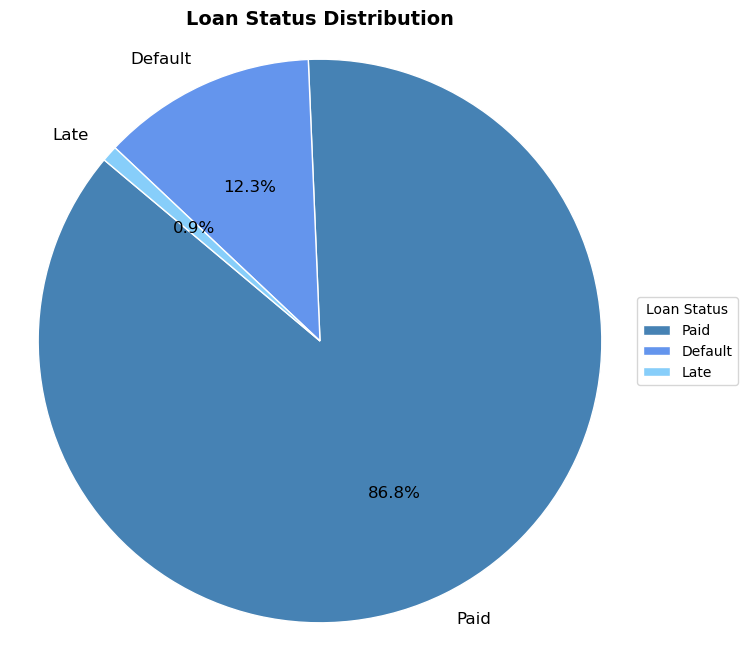

In [70]:
import matplotlib.pyplot as plt

# 假设df_copy是你的DataFrame，并且其中包含'loan_status'列
loan_status_counts = dfread['loan_status'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))  # 设置饼图的大小
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#4682B4', '#6495ED', '#87CEFA', '#B0C4DE', '#E0FFFF'],  # 学术风格的颜色
        textprops={'fontsize': 12, 'color': 'black'},  # 设置文本属性
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # 设置扇区边框

# 添加图例
plt.legend(title='Loan Status', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# 设置饼图的标题
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')

# 确保饼图是圆的
plt.axis('equal')
plt.savefig('loan_status_distribution.png', bbox_inches='tight', pad_inches=0.1)
# 显示图表
plt.show()

dfread.describe().T.to_csv("desc.csv")

In [4]:
# Dividing our dataset into independent and dependent features
X = dfread.drop("loan_status",axis=1)
# 选择 'loan_status' 列
y = dfread['loan_status']

In [72]:
type_dfread = type(dfread)
print("dfread 的类型是：", type_dfread)

dfread 的类型是： <class 'pandas.core.frame.DataFrame'>


## 这个部分先处理共线性非常大的数据，前6列--贷款基本情况


plt.show()

In [5]:
# For warnings
import warnings
warnings.filterwarnings(action='ignore')
categorical= [ 'home_ownership', 'verification_status', 'purpose',  'loan_status']
numerical=['installment','loan_amnt','int_rate','grade','sub_grade','term','annual_inc','dti','emp_length','collections_12_mths_ex_med','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util',]
# 使用 astype 方法将每列转换为 double 类型
for column in numerical:
    dfread[column] = dfread[column].astype('float64')

In [6]:
dfread.dtypes

loan_amnt                     float64
term                          float64
int_rate                      float64
installment                   float64
grade                         float64
sub_grade                     float64
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
last_pymnt_amnt               float64
loan_status                    object
collections_12_mths_ex_med    float64
dtype: object

In [75]:
dfread

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,collections_12_mths_ex_med
0,5000.0,36.0,0.1065,162.87,1.0,6.0,10.0,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,171.62,Paid,0.0
1,2400.0,36.0,0.1596,84.33,2.0,14.0,10.0,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,649.91,Paid,0.0
2,10000.0,36.0,0.1349,339.31,2.0,10.0,10.0,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,357.48,Paid,0.0
3,3000.0,60.0,0.1269,67.79,1.0,9.0,1.0,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,67.30,Paid,0.0
4,5000.0,36.0,0.0790,156.46,0.0,3.0,3.0,RENT,36000.0,Source Verified,...,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,161.03,Paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425416,12000.0,60.0,0.2869,378.65,5.0,25.0,10.0,MORTGAGE,64500.0,Not Verified,...,0.0,3.0,22.0,1.0,16478.0,0.513,42.0,10820.77,Paid,0.0
2425417,10000.0,36.0,0.0799,313.32,0.0,4.0,10.0,MORTGAGE,65000.0,Source Verified,...,1.0,0.0,15.0,0.0,9751.0,0.157,27.0,2151.99,Paid,0.0
2425418,10050.0,36.0,0.1699,358.26,3.0,15.0,8.0,RENT,37000.0,Not Verified,...,0.0,1.0,15.0,0.0,14300.0,0.470,21.0,358.26,Default,0.0
2425419,6000.0,36.0,0.1144,197.69,1.0,8.0,5.0,RENT,41000.0,Source Verified,...,1.0,0.0,9.0,0.0,1356.0,0.101,18.0,2958.01,Paid,0.0


In [7]:
high_vif_columns = ['installment','loan_amnt','int_rate','grade','sub_grade','term']

In [8]:
df_vif6 = dfread[high_vif_columns]
df_vif6

,installment,loan_amnt,int_rate,grade,sub_grade,term
0,162.87,5000.0,0.1065,1.0,6.0,36.0
1,84.33,2400.0,0.1596,2.0,14.0,36.0
2,339.31,10000.0,0.1349,2.0,10.0,36.0
3,67.79,3000.0,0.1269,1.0,9.0,60.0
4,156.46,5000.0,0.0790,0.0,3.0,36.0
...,...,...,...,...,...,...
2425416,378.65,12000.0,0.2869,5.0,25.0,60.0
2425417,313.32,10000.0,0.0799,0.0,4.0,36.0
2425418,358.26,10050.0,0.1699,3.0,15.0,36.0
2425419,197.69,6000.0,0.1144,1.0,8.0,36.0


In [9]:
df_vif6.corr()

,installment,loan_amnt,int_rate,grade,sub_grade,term
installment,1.000000,0.942325,0.102455,0.091318,0.092919,0.125805
loan_amnt,0.942325,1.000000,0.069807,0.068470,0.069917,0.388401
int_rate,0.102455,0.069807,1.000000,0.938349,0.963191,0.347170
grade,0.091318,0.068470,0.938349,1.000000,0.973243,0.351655
sub_grade,0.092919,0.069917,0.963191,0.973243,1.000000,0.361051
term,0.125805,0.388401,0.347170,0.351655,0.361051,1.000000


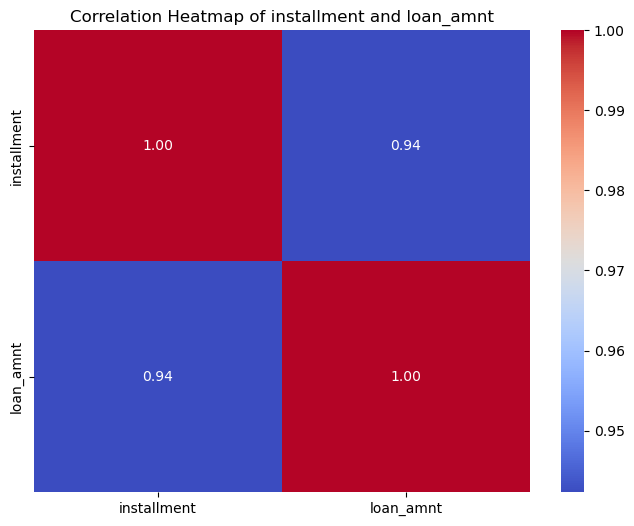

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关系数矩阵
corr_matrix = dfread[['installment', 'loan_amnt']].corr()

# 创建热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of installment and loan_amnt')
plt.show()

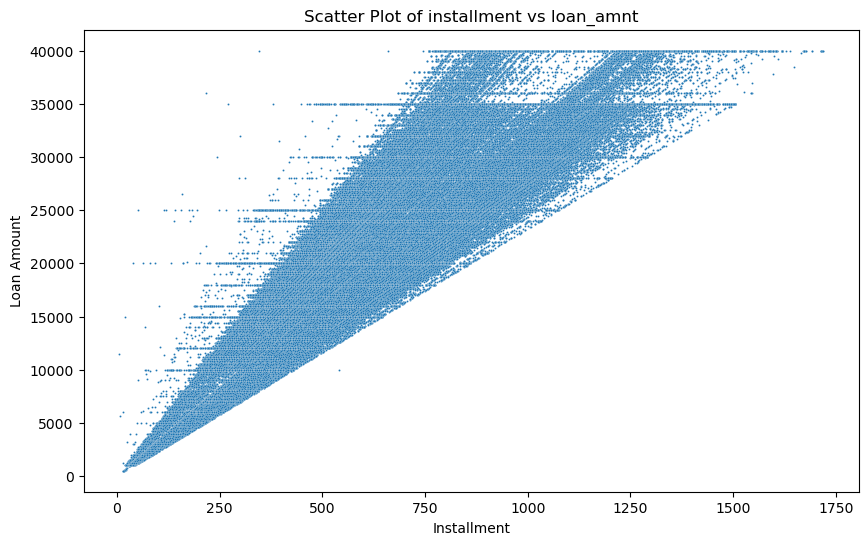

In [14]:
# 创建散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfread, x='installment', y='loan_amnt',s=2)
plt.title('Scatter Plot of installment vs loan_amnt')
plt.xlabel('Installment')
plt.ylabel('Loan Amount')
plt.show()

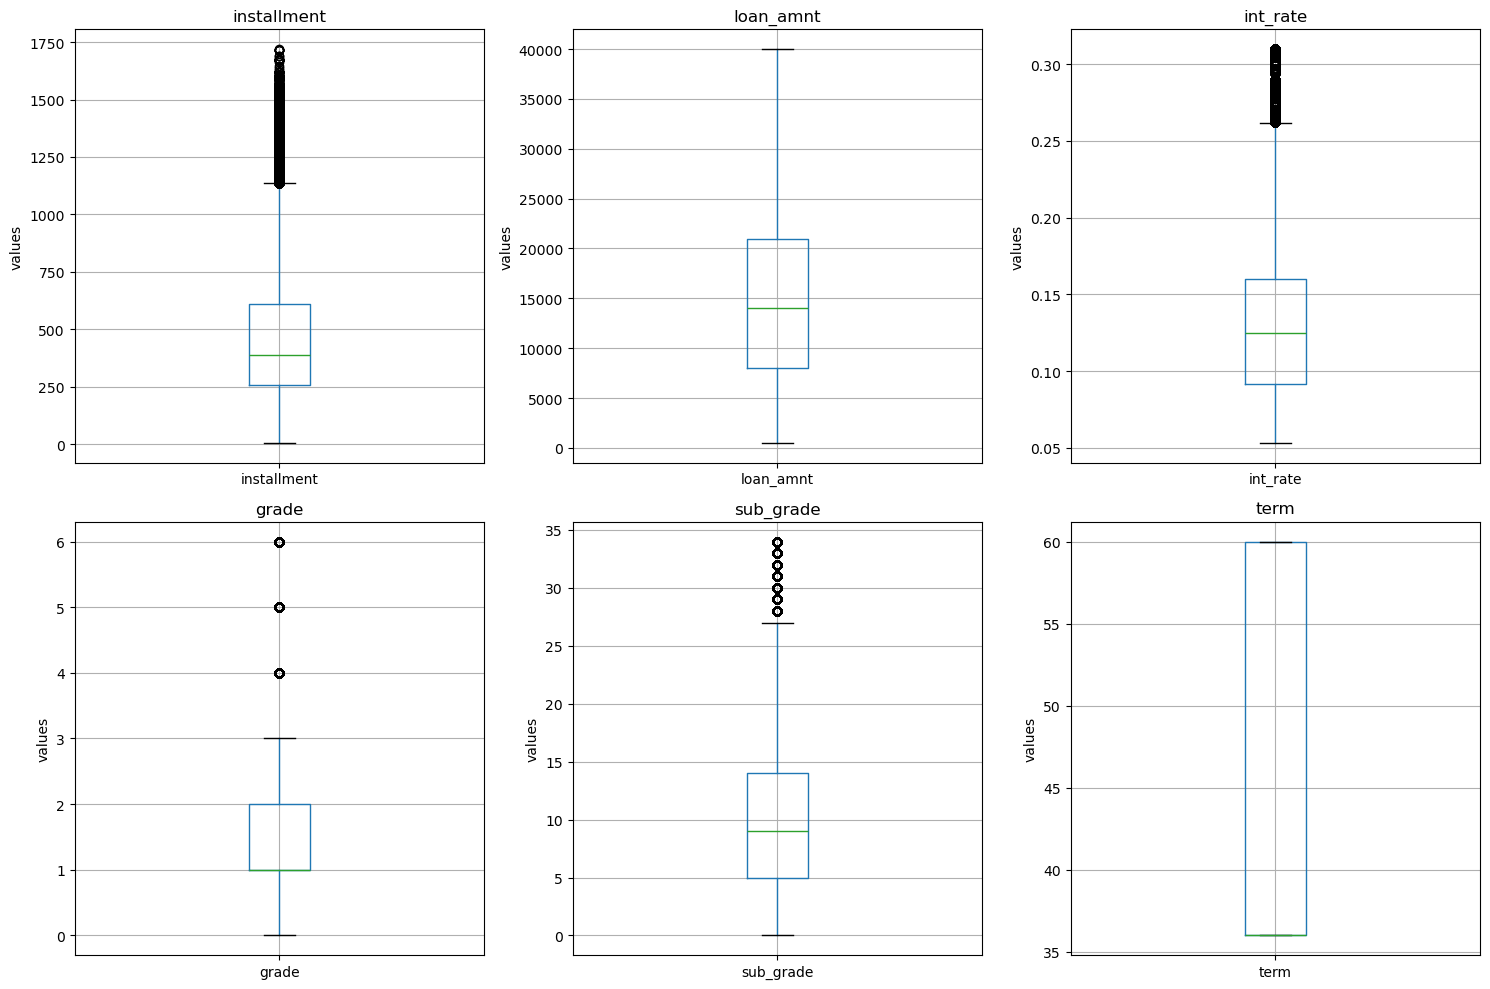

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 创建一个2行3列的子图网格

# 遍历每一列，为每一列绘制箱线图
for ax, column in zip(axes.flatten(), df_vif6.columns ):
    dfread.boxplot(column=column, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('values')

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
# 创建 MinMaxScaler 实例
scaler = MinMaxScaler()
# 计算归一化参数并转换数据
df_scaled = pd.DataFrame(scaler.fit_transform(df_vif6), columns=df_vif6.columns )

In [11]:
# 查看归一化后的数据
df_scaled.head(3)

,installment,loan_amnt,int_rate,grade,sub_grade,term
0,0.092099,0.113924,0.207944,0.166667,0.176471,0.0
1,0.046300,0.048101,0.414720,0.333333,0.411765,0.0
2,0.194985,0.240506,0.318536,0.333333,0.294118,0.0


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled.columns
# 计算每个特征的VIF值
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns ))]
# 打VIFf值
print(vif_data)
# 一般认为，IFf值大于10时存在较高的多重共线性
# 可以根据这个阈值来决定是否需要移除或合并某些特征

       feature         VIF
0  installment  146.122140
1    loan_amnt  155.560122
2     int_rate   51.001404
3        grade   39.737130
4    sub_grade   94.343299
5         term    8.125952


对于这些离散化的数据进行归一化以后vif还是很大

Number of components to keep to explain 95% of variance: 3


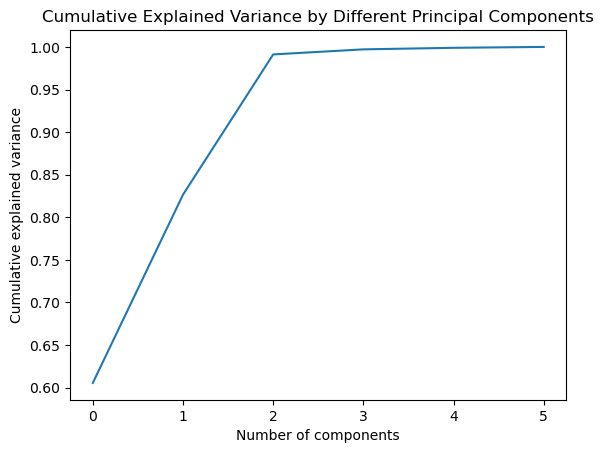

In [13]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# 创建 PCA 实例
pca = PCA()
# 对数据进行 PCA 变换
df_6pca = pca.fit_transform(df_scaled)
# 查看累积解释方差的比例
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
# 选择主成分的个数，使得累积解释方差达到 95%
n_components = (cumulative_explained_variance >= 0.95).argmax() + 1
# 打印选择的主成分个数
print(f"Number of components to keep to explain 95% of variance: {n_components}")
# 可视化累积解释方差
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
#plt.axhline(0.8, color='red', linestyle='--')
plt.title('Cumulative Explained Variance by Different Principal Components')
plt.show()
# 应用 PCA 并选择主成分
pca = PCA(n_components=n_components)
df_6pca = pca.fit_transform(df_scaled)
# 查看转换后的数据
#print(df_6pca)

In [14]:
# 创建一个新的 DataFrame 来存储主成分得分
df_pca_df = pd.DataFrame(df_6pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_df

,PC1,PC2,PC3
0,-0.411452,0.053206,-0.224839
1,-0.302615,0.391650,-0.191457
2,-0.289454,0.190877,-0.011405
3,0.503951,-0.084976,-0.614358
4,-0.489298,-0.132313,-0.290334
...,...,...,...
2425416,0.945611,0.697486,-0.049861
2425417,-0.445785,-0.178843,-0.146657
2425418,-0.192776,0.417440,0.073547
2425419,-0.385668,0.083916,-0.181265


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_pca_df.columns
# 计算每个特征的VIF值
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_pca_df.columns ))]
# 打VIFf值
print(vif_data)
# 一般认为，IFf值大于10时存在较高的多重共线性
# 可以根据这个阈值来决定是否需要移除或合并某些特征

  feature         VIF
0     PC1  146.122140
1     PC2  155.560122
2     PC3   51.001404


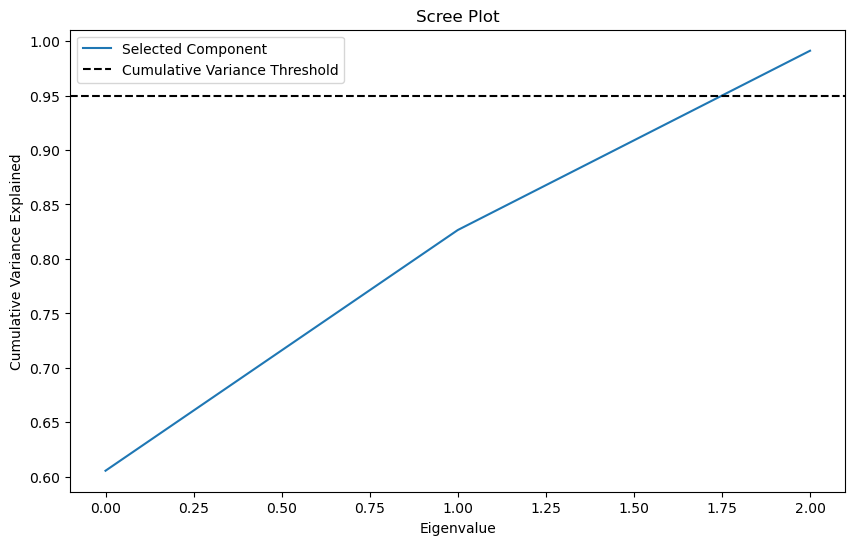

In [16]:
import numpy as np
# 获取特征值和累积方差解释率
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

# 绘制碎石图
plt.figure(figsize=(10, 6))
plt.plot( cumulative_variance_explained)
plt.xlabel('Eigenvalue')
plt.ylabel('Cumulative Variance Explained')
plt.title('Scree Plot')
#plt.axvline(cumulative_variance_explained.argmax() + 1, color='red', linestyle='--')
plt.axhline(0.95, color='black', linestyle='--')
plt.legend(['Selected Component', 'Cumulative Variance Threshold'])
plt.show()

In [17]:
cumulative_explained_variance#累计方差

array([0.60555872, 0.82655146, 0.99119156, 0.997141  , 0.99896297,
       1.        ])

In [18]:
# 计算每个主成分的方差解释率
explained_variance_ratio = pca.explained_variance_ratio_
from collections import Counter
# 将方差解释率转换为 Counter 对象
explained_variance_counter = Counter(explained_variance_ratio)

# explained_variance_counter 现在包含了每个主成分的方差解释率
print(explained_variance_counter)

Counter({0.605558716518475: 1, 0.22099274377931388: 1, 0.16464009623895648: 1})


### 然后是那四个类别列

Text(0.5, 1.0, 'Loan status count')

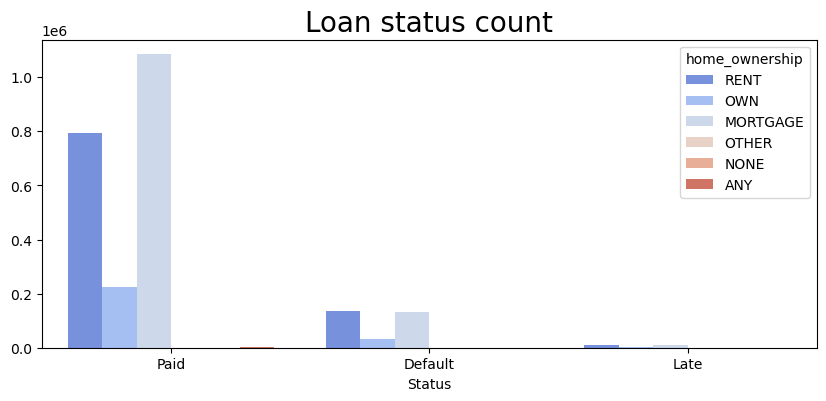

In [26]:
#  categorical= [ 'home_ownership', 'verification_status', 'purpose',  'loan_status']
import seaborn as sns
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=dfread,x="loan_status",hue="home_ownership",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

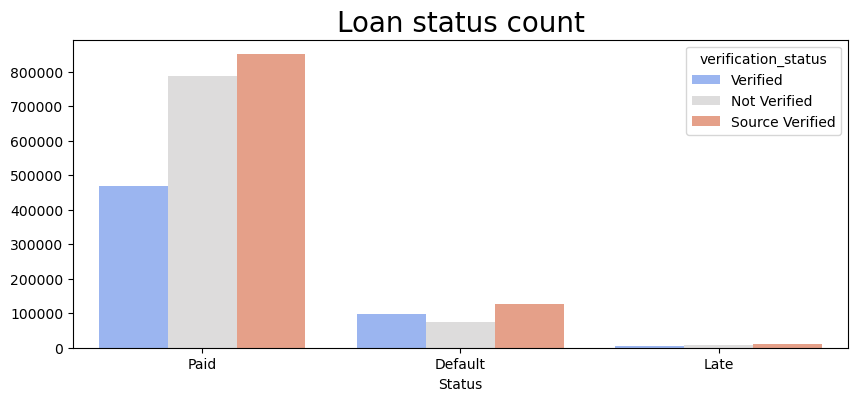

In [27]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=dfread,x="loan_status",hue="verification_status",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

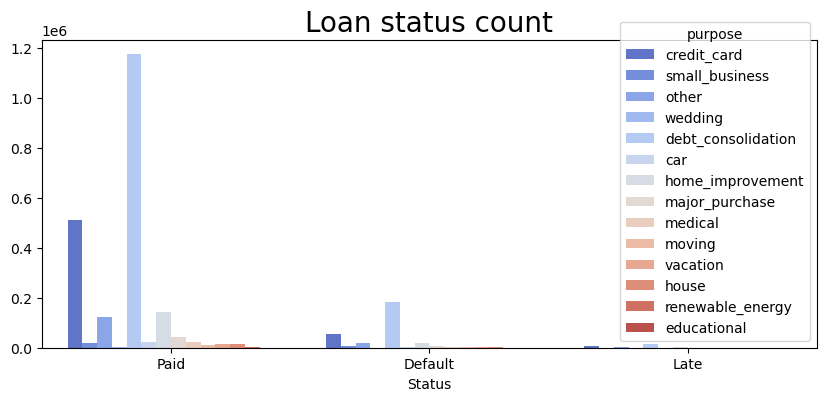

In [28]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=dfread,x="loan_status",hue="purpose",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

三张图能看见基本情况，类别不是很多，转换成独热编码

In [19]:
# One hot encoding
df_category=pd.get_dummies(data=dfread,columns=['home_ownership','verification_status','purpose'],drop_first=True)
# 删除原有的特征列
df_combined = df_category.drop(columns = high_vif_columns)
# 将主成分得分 DataFrame 拼接到原始 DataFrame
df_combined = pd.concat([df_combined, df_pca_df], axis=1)
# 现在 df_combined 包含了主成分得分，并且原有的特征列已经被删除

In [20]:
df_combined.head()

,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,PC1,PC2,PC3
0,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,...,False,False,False,False,False,False,False,-0.411452,0.053206,-0.224839
1,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,...,False,False,False,False,True,False,False,-0.302615,0.391650,-0.191457
2,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,...,False,False,True,False,False,False,False,-0.289454,0.190877,-0.011405
3,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,0.539,38.0,...,False,False,True,False,False,False,False,0.503951,-0.084976,-0.614358
4,3.0,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,...,False,False,False,False,False,False,True,-0.489298,-0.132313,-0.290334


### 建立模型

In [21]:
X=df_combined.drop('loan_status',axis=1)
y=df_combined['loan_status']

In [22]:
y

0             Paid
1             Paid
2             Paid
3             Paid
4             Paid
            ...   
2425416       Paid
2425417       Paid
2425418    Default
2425419       Paid
2425420    Default
Name: loan_status, Length: 2425421, dtype: object

In [23]:
print(X.shape)
print(y.shape)

(2425421, 35)
(2425421,)


In [24]:
y = pd.factorize(y)[0]
print(y)

[0 0 0 ... 1 0 1]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [27]:
X,y

(         emp_length  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
 0              10.0     24000.0  27.65          0.0             1.0       3.0   
 1              10.0     12252.0   8.72          0.0             2.0       2.0   
 2              10.0     49200.0  20.00          0.0             1.0      10.0   
 3               1.0     80000.0  17.94          0.0             0.0      15.0   
 4               3.0     36000.0  11.20          0.0             3.0       9.0   
 ...             ...         ...    ...          ...             ...       ...   
 2425416        10.0     64500.0   9.66          0.0             3.0      22.0   
 2425417        10.0     65000.0  19.55          1.0             0.0      15.0   
 2425418         8.0     37000.0  20.56          0.0             1.0      15.0   
 2425419         5.0     41000.0  19.99          1.0             0.0       9.0   
 2425420         4.0    105700.0  27.26          1.0             0.0      12.0   
 
          pub_

In [28]:
print(X.shape)
print(y.shape)

(2425421, 35)
(2425421,)


In [26]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train,X_test

(array([[1.00000000e+00, 6.36236445e-04, 1.85287140e-02, ...,
         1.17559855e-01, 3.51992558e-01, 3.91761869e-01],
        [1.00000000e+00, 4.72600060e-04, 1.90692600e-02, ...,
         7.79380114e-01, 5.89150045e-01, 3.30062121e-01],
        [8.88888889e-01, 1.99987298e-03, 1.37338712e-02, ...,
         1.62301003e-01, 1.68016351e-01, 6.29826240e-01],
        ...,
        [7.77777778e-01, 4.77727334e-04, 1.37238611e-02, ...,
         6.39686250e-01, 1.99754769e-01, 3.02498853e-01],
        [4.44444444e-01, 2.27145483e-04, 5.32537863e-03, ...,
         2.18711816e-01, 6.59183975e-01, 3.86290263e-01],
        [6.66666667e-01, 4.54418240e-04, 2.39742140e-02, ...,
         1.46297513e-01, 5.45665244e-01, 3.08696155e-01]]),
 array([[3.33333333e-01, 9.45327393e-04, 1.51653170e-02, ...,
         8.97474373e-02, 2.54393345e-01, 4.02960497e-01],
        [7.77777778e-01, 4.82700061e-04, 7.02709737e-03, ...,
         2.09411269e-01, 5.47305950e-01, 4.49867782e-01],
        [1.11111111e-01, 

开始采样

In [292]:
from imblearn.under_sampling import NearMiss               # For Undersampling
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
model1=RandomForestClassifier()
model1.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [293]:
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversamplingns=NearMiss()
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({'Paid': 1578003, 'Default': 224322, 'Late': 16740})
The number of classes after fit Counter({'Default': 16740, 'Late': 16740, 'Paid': 16740})


In [294]:
df_combined['loan_status'].value_counts()

loan_status
Paid       2104616
Default     298533
Late         22272
Name: count, dtype: int64

In [295]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred=model1.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 15933  56269   2009]
 [   611   4636    285]
 [ 64663 405275  56675]]


Accuracy Score: 
 0.12739050986549155


Classification Report: 
               precision    recall  f1-score   support

     Default       0.20      0.21      0.21     74211
        Late       0.01      0.84      0.02      5532
        Paid       0.96      0.11      0.19    526613

    accuracy                           0.13    606356
   macro avg       0.39      0.39      0.14    606356
weighted avg       0.86      0.13      0.19    606356



oversampling

In [27]:
from sklearn.ensemble import RandomForestClassifier

# 加载已经保存的抽样文件
X_train_os = np.load("./X_train_os.npy")
y_train_os = np.load("./y_train_os.npy")

model2 = RandomForestClassifier()
model2.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [33]:
from collections import Counter
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 1578003, 1: 224322, 2: 16740})
The number of classes after fit Counter({0: 1578003, 1: 1578003, 2: 1578003})


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred=model2.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[510982  15631      0]
 [ 53884  20327      0]
 [  5152    380      0]]


Accuracy Score: 
 0.8762327741458813


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93    526613
           1       0.56      0.27      0.37     74211
           2       0.00      0.00      0.00      5532

    accuracy                           0.88    606356
   macro avg       0.49      0.41      0.43    606356
weighted avg       0.85      0.88      0.85    606356



暂时选过采样oversampling，准确度达到88%

## Model Training <a class="anchor" id="model_training"></a>

### Hyperparameter Tuning with Keras Tuner <a class="anchor" id="hyperparameter"></a>使用Keras调谐器进行超参数调优

In [28]:
print(X_train_os.shape)
print(y_train_os.shape)
print(X_test.shape)
print(y_test.shape)

(4734009, 35)
(4734009,)
(606356, 35)
(606356,)


In [29]:
from keras.utils import to_categorical
# 将整数标签转换为one-hot编码
y_train_os = to_categorical(y_train_os)
y_test = to_categorical(y_test)

# 输出转换后的one-hot编码标签
# print(y)
print(y_train_os.shape)
print(y_test.shape)

(4734009, 3)
(606356, 3)


In [30]:
# Define the build_model function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 4, 20)):#可变数量的Dense层(2到20之间)和一个可变数量的unit(32到512之间)
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(3, activation='Softmax'))#三分类 三个输出节点
    model.compile(
    optimizer=keras.optimizer.adam.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
    loss='categorical_crossentropy',
    metrics=['accuracy']  #评估模型性能的指标
)
    print(type(model))
    return model

#####  对Keras Tuner的'build_model'函数的解释
- 该函数接受调优器定义的超参数，并返回编译后的Keras模型。
- 该函数定义了一个Keras sequence模型，并添加了一个可变数量的Dense层(2到20之间)和一个可变数量的unit(32到512之间)。
- 输出层有一个具有Softmax激活函数的单元(因为这是一个分类问题)。
- 函数以多类交叉熵作为损失函数，用学习率从[1e-2]中随机选择的Adam优化器编译模型，

In [31]:
#from keras_tuner.tuners import RandomSearch
from keras_tuner import RandomSearch
from keras.optimizers import Adam
from tensorflow import keras
tuner = RandomSearch(                   # 调谐器使用前面定义的build_model函数作为其模型构建函数
    build_model,                        # 根据给定的超参数构建模型  并根据验证精度搜索最佳超参数
    objective='val_accuracy', #调谐器要优化的目标，这里设置为 'val_accuracy'，调谐器将基于验证集的准确率来评估和选择最佳超参数。
    max_trials=3,  #调谐器将执行的最大试验次数，即它会尝试不同的超参数组合的最大次数
    executions_per_trial=2,)  #每次试验中模型构建和评估的次数
tuner.search(X_train_os, y_train_os, epochs=10, validation_data=(X_test, y_test))  # 执行超参数搜索

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]                # 将一个最佳超参数存储在best_hps变量中

Reloading Tuner from .\untitled_project\tuner0.json


In [104]:
print(best_hps)

## 开始构建模型

In [32]:
#定义create_model函数来构建具有最佳超参数的Keras模型
#from keras.wrappers.scikit_learn import KerasClassifier
def create_model(num_layers, num_nodes, activation):
    model = keras.Sequential()
    for i in range(num_layers):
        if i==0:      #对于第一层（输入层），需要指定 input_dim 参数，它应该与特征维度匹配。
            model.add(layers.Dense(num_nodes[i], input_dim=X_train.shape[1]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))
        else:   #对于其他层，只需要指定每层的神经元数量。每层都使用了相同的激活函数和 Dropout 正则化来减少过拟合。
            model.add(layers.Dense(num_nodes[i]))
            model.add(layers.Activation(activation))
            model.add(layers.Dropout(0.3))       
    model.add(layers.Dense(units=3, kernel_initializer='glorot_uniform', activation='Softmax'))  #输出层
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  #编译
    return model

# 从之前找到的最佳超参数 best_hps 中提取每层的神经元数量，并构建了一个列表 num_nodes。这个列表随后可以用于 create_model 函数来构建模型。
num_nodes = [best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]

In [33]:
best_hps.get('num_layers')

3

In [34]:
print(num_nodes)

[288, 320, 64]


In [35]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(
    build_fn=create_model,
    num_layers=best_hps.get('num_layers'),  #设置模型的层数  build_model
    num_nodes=num_nodes, #设置每一层的神经元数量  create_model
    activation='Softmax'
)

##### 最后，我们使用scikit-learn中的KerasClassifier类来封装create_model函数，并创建一个与scikit-learn兼容的估算器。
##### 我的“create_model”函数的解释
- 该函数使用从tuner获得的最佳超参数。
- 这个函数有三个参数- num_layers, num_nodes和activation，它们用于构建具有给定层数和每层激活函数的模型。
- 使用keras.Sequential()方法创建模型对象。
- 在层上运行一个循环，将密集层添加到模型中。input_dim is added as the input shape for the layer
- 在第一次迭代中，执行检查以查看当前层是否为模型的第一层。如果是，则添加input_dim作为t的输入形状
- num_nodes变量是一个整数列表，表示模型每一层中节点的数量，从最佳超参数字典中提取。- 在每个密集层后面添加一个激活函数和一个dropout层。激活参数用于指定每一层的激活函数。
- 6.
编译模型：使用 compile 方法来编译模型，指定优化器为 'adam'，损失函数为 'categorical_crossentropy'（多分类问题的常用损失函数），评估指标为 'accuracy'。
7.
返回模型：最后，函数返回构建好的 model 对象。编

In [115]:
from tensorflow.keras import layers
# from keras.callbacks import ModelCheckpoint
# model_checkpoint = ModelCheckpoint("best_bp_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
# 用最优超参数拟合Keras分类器模型
mymodel= model.fit(X_train_os, y_train_os, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
147938/147938 [==============================] - 685s 5ms/step - loss: 0.9560 - accuracy: 0.4907 - val_loss: 0.4925 - val_accuracy: 0.8512
Epoch 2/3
147938/147938 [==============================] - 617s 4ms/step - loss: 0.8970 - accuracy: 0.5486 - val_loss: 0.4756 - val_accuracy: 0.8478
Epoch 3/3
147938/147938 [==============================] - 626s 4ms/step - loss: 0.8740 - accuracy: 0.5736 - val_loss: 0.4668 - val_accuracy: 0.8452


In [116]:
# from keras.models import load_model
# model = load_model("best_bp_model.h5")
y_pred=model.predict(X_test)

18949/18949 [==============================] - 30s 2ms/step


### 计算特征值的重要程度

In [ ]:
import shap

# 创建一个 SHAP Explainer 对象
explainer = shap.DeepExplainer(mymodel, X_train)

# 计算每个样本的 SHAP 值
shap_values = explainer.shap_values(X_test)

# 计算每个特征的平均 SHAP 值
feature_importances = np.abs(shap_values).mean(0)

# 打印每个特征的平均 SHAP 值
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

### y_pred

## Result <a class="anchor" id="result"></a>

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 假设 y_true 是真实的标签，y_pred 是模型的预测结果
# y_true 和 y_pred 应该是one-hot编码的形式，如果不是，请先进行转换

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# 计算精确率
precision = precision_score(y_test, y_pred, average='weighted')  # 使用'weighted'来考虑每个类别的支持（样本数量）
print("Precision: ", precision)

# 计算召回率
recall = recall_score(y_test, y_pred, average='weighted')  # 使用'weighted'来考虑每个类别的支持
print("Recall: ", recall)

# 计算F1分数
f1 = f1_score(y_test, y_pred, average='weighted')  # 使用'weighted'来考虑每个类别的支持
print("F1 Score: ", f1)

Accuracy:  0.8452394303016709
Precision:  0.8103894742985469
Recall:  0.8452394303016709
F1 Score:  0.8239999616932381


### 试试其他模型预测准确度

In [48]:
# 将独热编码标签转换为一维数组
y_train_os_other = np.argmax(y_train_os, axis=1)
y_test_other = np.argmax(y_test, axis=1)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 创建逻辑回归模型
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# 训练模型
log_reg.fit(X_train_os, y_train_os_other)

# 预测测试集
y_pred_log_reg = log_reg.predict(X_test)

# 创建决策树模型
decision_tree = DecisionTreeClassifier()

# 训练模型
decision_tree.fit(X_train_os, y_train_os_other)

# 预测测试集
y_pred_decision_tree = decision_tree.predict(X_test)

# 计算准确率
accuracy_log_reg = accuracy_score(y_test_other, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test_other, y_pred_decision_tree)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")

Logistic Regression Accuracy: 0.5681388505727702
Decision Tree Accuracy: 1.0


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 计算准确率
accuracy = accuracy_score(y_test_other, y_pred_log_reg)
print("逻辑回归 Accuracy: ", accuracy)

# 计算精确率
precision = precision_score(y_test_other, y_pred_log_reg, average='weighted')
print("逻辑回归 Precision: ", precision)

# 计算召回率
recall = recall_score(y_test_other, y_pred_log_reg, average='weighted')
print("逻辑回归 Recall: ", recall)

# 计算F1分数
f1 = f1_score(y_test_other, y_pred_log_reg, average='weighted')
print("逻辑回归 F1 Score: ", f1)

逻辑回归 Accuracy:  0.5681388505727702
逻辑回归 Precision:  0.5765290548970148
逻辑回归 Recall:  0.5681388505727702
逻辑回归 F1 Score:  0.5706044266488012


In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 计算准确率
accuracy = accuracy_score(y_test_other, y_pred_decision_tree)
print("决策树模型 Accuracy: ", accuracy)

# 计算精确率
precision = precision_score(y_test_other, y_pred_decision_tree, average='weighted')
print("决策树模型 Precision: ", precision)

# 计算召回率
recall = recall_score(y_test_other, y_pred_decision_tree, average='weighted')
print("决策树模型 Recall: ", recall)

# 计算F1分数
f1 = f1_score(y_test_other, y_pred_decision_tree, average='weighted')
print("决策树模型 F1 Score: ", f1)

决策树模型 Accuracy:  1.0
决策树模型 Precision:  1.0
决策树模型 Recall:  1.0
决策树模型 F1 Score:  1.0


svm预测

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 创建SVM模型
svm_model = SVC(kernel='linear', probability=True)  # 使用线性核函数，并开启概率估计

# 训练模型
svm_model.fit(X_train_os, y_train_os_other)

# 预测测试集
y_pred_svm = svm_model.predict(X_test)

# 将预测结果转换回原始标签
y_pred_labels = label_encoder.inverse_transform(y_pred_svm)

# 计算准确率
accuracy = accuracy_score(y_test_other, y_pred_labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 计算准确率
accuracy = accuracy_score(y_test_other, y_pred_svm)
print("SVM模型 Accuracy: ", accuracy)

# 计算精确率
precision = precision_score(y_test_other, y_pred_svm, average='weighted')
print("SVM模型 Precision: ", precision)

# 计算召回率
recall = recall_score(y_test_other, y_pred_svm, average='weighted')
print("SVM模型 Recall: ", recall)

# 计算F1分数
f1 = f1_score(y_test_other, y_pred_svm, average='weighted')
print("SVM模型 F1 Score: ", f1)

XGboost预测

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 创建DMatrix
dtrain = xgb.DMatrix(X_train_os, label=y_train_os_other)
dtest = xgb.DMatrix(X_test, label=y_test_other)

# 设置参数
params = {
    'objective': 'multi:softmax',  # 设置多分类任务
    'num_class': 3,  # 设置类别的数量
    'eval_metric': 'mlogloss'  # 设置评估指标
}

# 训练模型
num_rounds = 100  # 设置迭代次数
bst = xgb.train(params, dtrain, num_rounds)

# 预测测试集
y_pred_XGboost = bst.predict(dtest)


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 计算准确率
accuracy = accuracy_score(y_test_other, y_pred_XGboost)
print("XGboost模型 Accuracy: ", accuracy)

# 计算精确率
precision = precision_score(y_test_other, y_pred_XGboost, average='weighted')
print("XGboost模型 Precision: ", precision)

# 计算召回率
recall = recall_score(y_test_other, y_pred_XGboost, average='weighted')
print("XGboost模型 Recall: ", recall)

# 计算F1分数
f1 = f1_score(y_test_other, y_pred_XGboost, average='weighted')
print("XGboost模型 F1 Score: ", f1)

XGboost模型 Accuracy:  0.6494452104044489
XGboost模型 Precision:  0.8879574181110147
XGboost模型 Recall:  0.6494452104044489
XGboost模型 F1 Score:  0.7201004614341899


### 画图

In [39]:
remain=['installment','loan_amnt','int_rate','grade','sub_grade','term','annual_inc','dti','emp_length','collections_12_mths_ex_med','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util',]

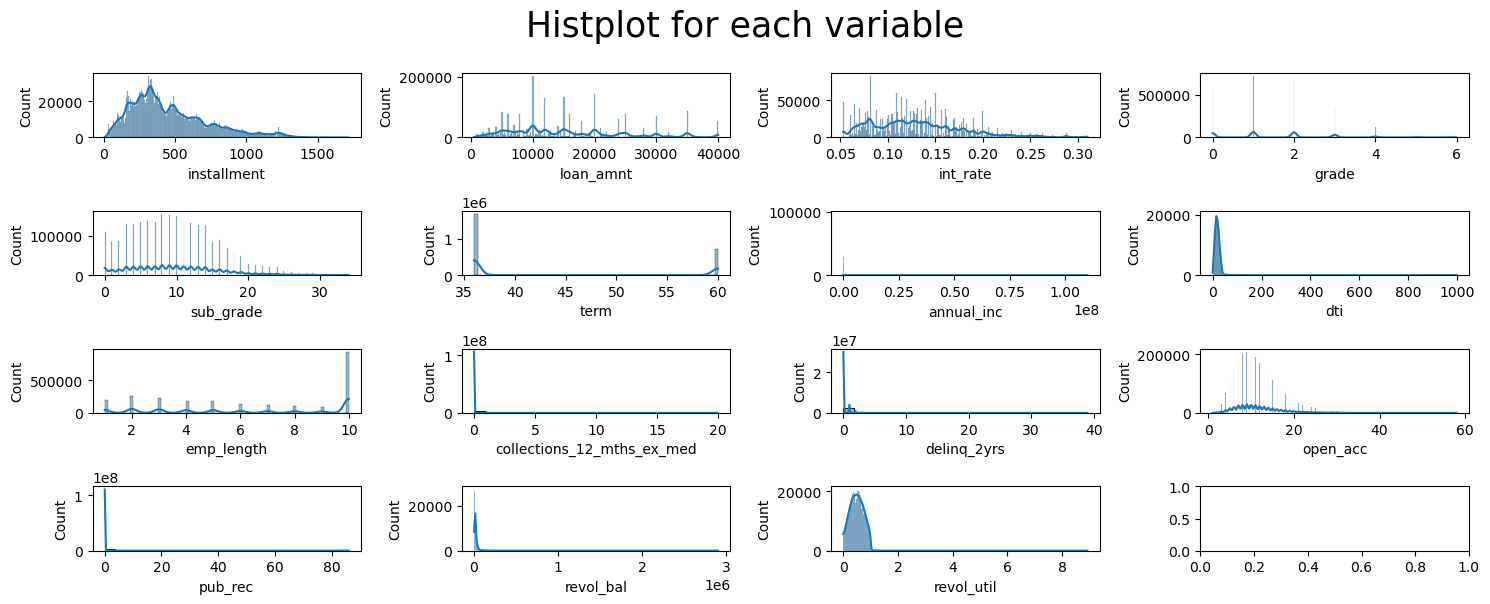

In [46]:
def histplot_visual(data,column):
    fig, ax = plt.subplots(4,4,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=25)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=dfread,column=remain)
plt.tight_layout()

IndexError: index 12 is out of bounds for axis 0 with size 12

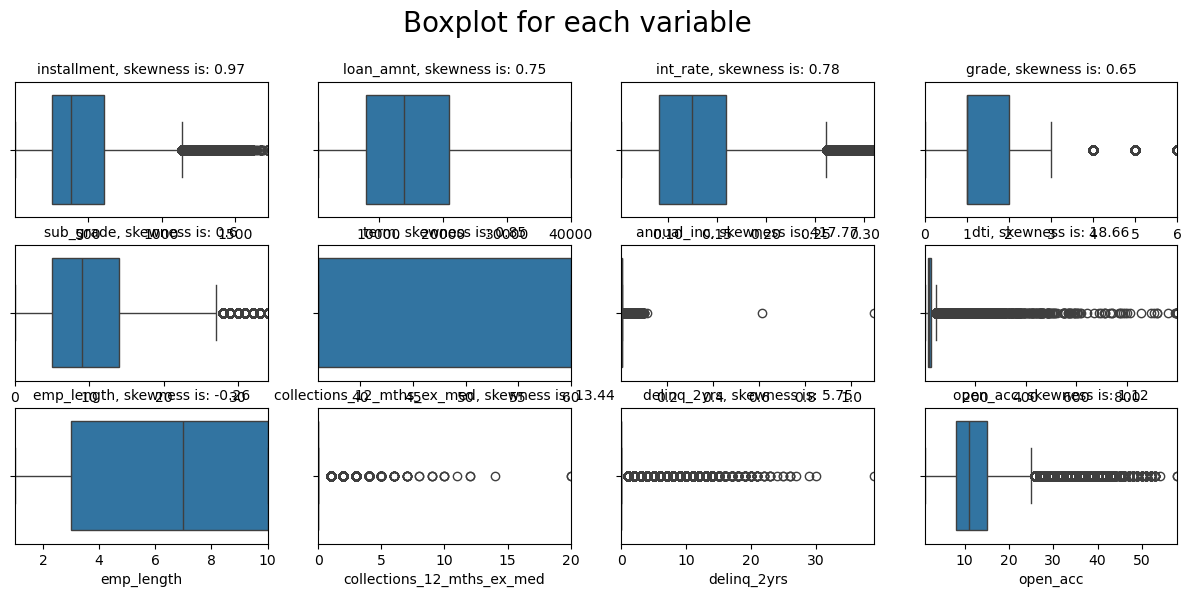

In [41]:
#Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,4,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df_combined,column=remain)
plt.tight_layout()